# Demo Scenario 3
> Validate Demonstrate Scenario 3 on a notebook

The goal of this scenario is to demonstrate built-in GPT Function calling tools for building a monitor pipeline in a relevant use case.

The scenario of this demo is a user wanting to build a pipeline to monitor visual data from a Youtube Live (or any streaming services). Without our application, the user would need to manually integrate and configure various tools, write custom code to connect them to the streaming service, and ensure the system is able to process and analyze the live visual feed in real-time. This approach can be complex, time-consuming, and prone to errors, especially without deep technical knowledge. Additionally, maintaining a smooth and efficient pipeline that handles real-time visual data poses a significant challenge.

Our application simplifies this process by automating the integration and configuration of the necessary tools. In the preparation stage, the user only needs to set up primitive tools or import from our default functions. From then, the user can easily design and manage the pipeline using plain language instructions, while the GPT FC handles the integration and seamlessly chains complex processes. This enables the user to monitor live visual data in real time without the need for extensive coding or technical expertise, making the process more efficient and accessible.

In this demo, we will monitor the number of cars and available lots in the parking lots shown in the Youtube Live: https://www.youtube.com/watch?v=mwN6l3O1MNI.

In [ ]:
#| hide
from nbdev.showdoc import *

## Step 1 - Preparation

For this demo, we will use the built-in tools from `llmcam.vision` modules and integrate the simple notification system from `llmcam.utils.notification`. 

At the preparation step, the main tasks include:

- Import necessary built-in tools from `llmcam.core`, `llmcam.vision`, and `llmcam.utils.notification` modules.  
- Set up initial `tools` list and add built-in tools from `llmcam.vision`.  
- Set up notification systems as instructed in `utils/03_notification.ipynb`.  
- Verify set up with GPT messages.  

In [ ]:
#| eval: false
# Import all the necessary modules
from llmcam.core.fc import *
from llmcam.core.fn_to_schema import *
from llmcam.utils.notification import *
from llmcam.vision.ytlive import *
from llmcam.vision.gpt4v import *
from llmcam.vision.yolo import *

In [ ]:
#| eval: false
# Define the `tools` list with default built-in functions
tools = [function_schema(func, "llmcam_vision") for func in [
    capture_youtube_live_frame, 
    ask_gpt4v_about_image_file,
    detect_objects
]]

In [ ]:
#| eval: false
# Define the `send_notification` function that adds a message to the `notifications` list
notifications = []
def send_notification(msg: str):
    """Send a notification"""
    notifications.append(msg)
    return notifications

# Define a function that starts the notification stream using the default functions
def start_notification_stream(
    messages: list  # Previous conversation with the user
):
    return notification_stream_core(
        tools, 
        messages,
        stream_starter=default_stream_starter,  # Default stream starter from `llmcam.utils.notification` module
        send_notification=send_notification,
        stream_stopper=default_stream_stopper  # Default stream stopper from `llmcam.utils.notification` module
    )

# Add the start_notification_stream function to the tools list
tools.append(process_notification_schema(start_notification_stream))

In [ ]:
#| eval: false
# Start the conversation and verify the tools
messages = form_msgs([
    # For consistency performance, describe in details how the system should work
    ('system', 'You are a helpful system administrator. Use the supplied tools to assist the user. \
If asked to monitor and notify, do not resolve in main thread but defer to sub GPT in notifcation stream instead.'),
    ('user', 'What tools can you use?'),
])
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
I can use the following tools:  1. **capture_youtube_live_frame**: Capture a JPEG image from a
YouTube Live stream.  2. **ask_gpt4v_about_image_file**: Provide detailed quantitative information
about a given image file.  3. **detect_objects**: Detect objects in an image using the YOLO model.
4. **start_notification_stream**: Begin monitoring and notifying you about certain events or
conditions based on our conversation.  5. **multi_tool_use.parallel**: Execute multiple tools in
parallel, allowing for simultaneous operations when possible.


## Step 2 - Test ML pipeline with a single real-time image

We first test the pipeline with a single usage (not streamlined into the monitoring stream). This testing phase will proceed as follows: 

- Capture an image from the parking lot.  
- Extract basic information and (if possible) the number of total parking lots.  
- Detect the number of cars (with YOLO) and (if possible) the number of current available parking lots.  

In [ ]:
#| eval: false
# Capture a frame from the YouTube live stream
messages.append(form_msg(
    'user', 
    'Capture an image of the parking lots in https://www.youtube.com/watch?v=mwN6l3O1MNI. \
Tell me also the file path of the captured image.'))
complete(messages, tools=tools)
print_msg(messages[-1])

[youtube] Extracting URL: https://www.youtube.com/watch?v=mwN6l3O1MNI
[youtube] mwN6l3O1MNI: Downloading webpage
[youtube] mwN6l3O1MNI: Downloading ios player API JSON
[youtube] mwN6l3O1MNI: Downloading mweb player API JSON
[youtube] mwN6l3O1MNI: Downloading m3u8 information
[youtube] mwN6l3O1MNI: Downloading m3u8 information
>> Assistant:
The image of the parking lots from the YouTube Live stream has been captured. The file path of the
captured image is `/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_04:48:27_parking lots.jpg`.


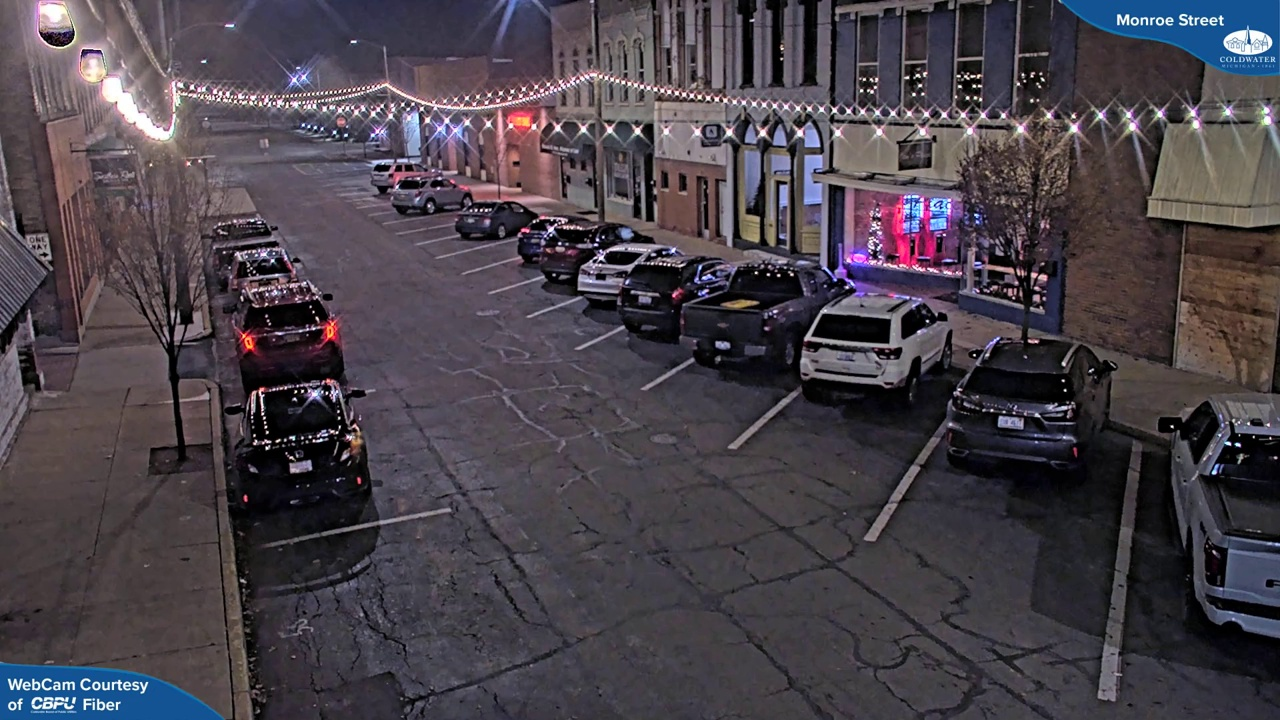

In [ ]:
#| eval: false
# Display the captured image
from IPython.display import Image
Image("/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_04:48:27_parking lots.jpg")

In [ ]:
#| eval: false
# Ask GPT-4 Vision about the captured image
messages.append(form_msg("user", "Tell me about the number of total parking lots and any extra information."))
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
The captured image of the parking lots contains the following information:  - **Dimensions of the
image**: 1280 x 720 pixels - **Total Buildings**: 8, ranging from 2 to 3 stories in height -
**Vehicles**: 14 cars and 1 truck - **Available Parking Spaces**: 6 - **Street Lights**: 12 -
**People**: None visible in the image - **Time of Day**: Night - **Lighting**: Prominent artificial
lighting - **Visibility**: Clear - **Sky Visibility**: The sky is not visible in the image.


In [ ]:
#| eval: false
# Detect objects in the captured image
messages.append(form_msg(
    "user", 
    "Detect the number of cars and the currently available parking lots in the image."
))
complete(messages, tools=tools)
print_msg(messages[-1])


image 1/1 /home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_04:48:27_parking lots.jpg: 384x640 18 cars, 1 umbrella, 48.4ms
Speed: 3.2ms preprocess, 48.4ms inference, 210.6ms postprocess per image at shape (1, 3, 384, 640)
>> Assistant:
The image analysis using object detection reveals:  - **Number of Cars**: 18 - **Umbrella**: 1
Previously, it was noted there were 6 available parking spaces. However, with the discrepancy in the
number of detected cars (18 vs. previously noted 14), it's possible that the detection might account
for vehicles outside the originally anticipated area or visibility factors vary in automated
detection. Therefore, an accurate count of available parking spaces might need manual verification
or confirmation against the expected lot capacity and layout.


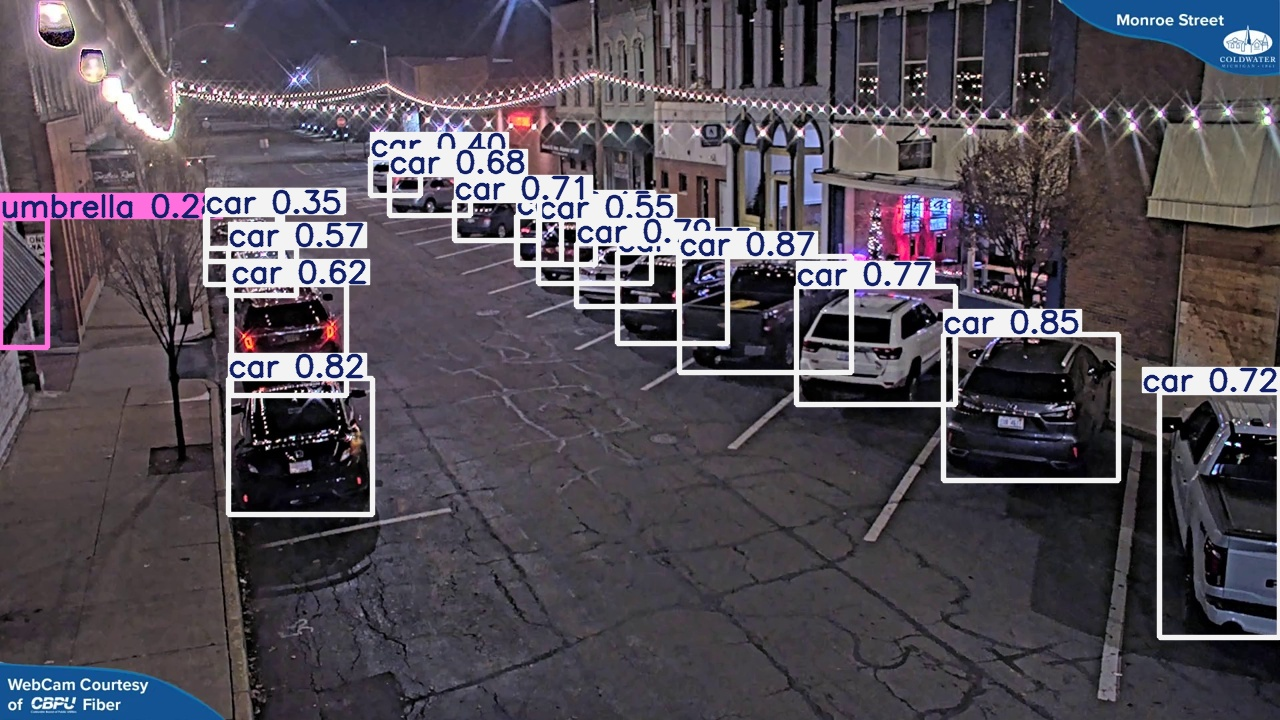

In [ ]:
#| eval: false
Image("/home/nghivo/tinyMLaaS/llmcam/data/detection_cap_2024.12.20_04:48:27_parking lots.jpg")

## Step 3 - Streamline the detection process with monitoring stream and notifications

After validating that the pipeline works, we can streamline this whole process with a continuous monitoring stream and sending notifications on certain events using the built-in notification stream framework. At this step, the user can simply ask the GPT to start a separate monitoring stream for notifying certain events. The user can also set a stopping criterion, e.g., stop after `x` notifications, stop after 3 days, ...

In [ ]:
#| eval: false
# Start the notification stream
messages.append(form_msg(
    "user", 
    "Start a separate notification stream and notify me whenever there are more than 10 cars in the parking lots. \
Stop after 3 notifications."
))
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
I've started a separate notification stream to notify you whenever there are more than 10 cars in
the parking lots. This will stop after 3 notifications.


As noticeable here, the monitoring process is detached from the main thread as logs from YOLO detection are not displayed.

In [ ]:
#| eval: false
# Check the notifications
for msg in notifications:
    print(msg)

Notification stream initiated for car count monitoring in the parking lots.


## **CONVERSATION TRANSCRIPT**

In [ ]:
#| eval: false
print_msgs(messages)

>> System:
You are a helpful system administrator. Use the supplied tools to assist the user. If asked to
monitor and notify, do not resolve in main thread but defer to sub GPT in notifcation stream
instead.
>> User:
What tools can you use?
>> Assistant:
I can use the following tools:  1. **capture_youtube_live_frame**: Capture a JPEG image from a
YouTube Live stream.  2. **ask_gpt4v_about_image_file**: Provide detailed quantitative information
about a given image file.  3. **detect_objects**: Detect objects in an image using the YOLO model.
4. **start_notification_stream**: Begin monitoring and notifying you about certain events or
conditions based on our conversation.  5. **multi_tool_use.parallel**: Execute multiple tools in
parallel, allowing for simultaneous operations when possible.
>> User:
Capture an image of the parking lots in https://www.youtube.com/watch?v=mwN6l3O1MNI. Tell me also
the file path of the captured image.
>> Assistant:
The image of the parking lots from the You